In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.spatial.transform import Rotation as R

In [32]:
pelvis = pd.read_csv('David-50-pokus01-2senzory/Xsens_DOT_2_D422CD006474_20250409_110615.csv', skiprows= 7,  sep=',')
right = pd.read_csv('David-50-pokus01-2senzory/Xsens_DOT_4_D422CD006380_20250409_110615.csv', skiprows= 7,  sep=',')
left = pd.read_csv('David-50-pokus01-2senzory/Xsens_DOT_3_D422CD006379_20250409_110615.csv', skiprows= 7,  sep=',')

In [33]:
right 

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z
0,0,2629997127,-21.606136,-83.807968,117.275513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2630013794,-21.519773,-83.715096,117.120819,9.807603,-0.559483,1.034963,-4.003567,5.652737,-0.196994
2,2,2630030461,-21.406376,-83.632004,116.971878,9.768225,-0.482423,0.996431,-1.959378,5.097683,-0.390382
3,3,2630047128,-21.253376,-83.547188,116.809517,9.732838,-0.528702,0.947086,-0.581031,5.245610,-0.479617
4,4,2630063795,-21.134399,-83.491356,116.676544,9.759027,-0.422329,1.074796,-0.365602,3.534975,-0.892366
...,...,...,...,...,...,...,...,...,...,...,...
730,730,2642164037,55.518429,-85.305183,34.077881,9.556036,0.687961,0.382950,-2.661282,-0.117351,-5.363127
731,731,2642180704,56.025368,-85.253563,33.522919,9.665014,0.748576,0.482267,-2.753987,-0.435371,-5.340422
732,732,2642197371,56.564949,-85.208298,32.958817,9.692216,0.830426,0.470750,-1.339871,-0.744235,-5.063522
733,733,2642214038,57.148792,-85.164635,32.358601,9.739381,0.833458,0.510800,-0.822827,-1.002142,-5.096550


In [34]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
right['real_ticks'] = right['SampleTimeFine'] - right['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
right['time_s'] = right['real_ticks'] * 1e-6

# Convert seconds to milliseconds
right['time_ms'] = right['time_s'] * 1000
#  show the actual intervals between samples
right['delta_ms'] = right['time_ms'].diff()

In [35]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
left['real_ticks'] = left['SampleTimeFine'] - left['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
left['time_s'] = left['real_ticks'] * 1e-6

# Convert seconds to milliseconds
left['time_ms'] = left['time_s'] * 1000
#  show the actual intervals between samples
left['delta_ms'] = left['time_ms'].diff()

In [36]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
pelvis['real_ticks'] = pelvis['SampleTimeFine'] - pelvis['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
pelvis['time_s'] = pelvis['real_ticks'] * 1e-6

# Convert seconds to milliseconds
pelvis['time_ms'] = pelvis['time_s'] * 1000
#  show the actual intervals between samples
pelvis['delta_ms'] = pelvis['time_ms'].diff()

In [37]:
left.head(5)

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
0,0,2629980460,-131.156799,-81.902946,-147.385330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000,NaN
1,1,2629997127,-131.001144,-81.925888,-147.393814,9.714273,-0.954535,-0.935966,9.895130,1.476144,-0.633991,16667,0.016667,16.667,16.667
2,2,2630013794,-130.826797,-81.942467,-147.437210,9.706797,-0.995866,-0.934217,9.010850,1.447636,-0.171170,33334,0.033334,33.334,16.667
3,3,2630030461,-130.654663,-81.957947,-147.481628,9.720042,-0.950114,-0.855736,8.967854,1.383406,-0.122397,50001,0.050001,50.001,16.667
4,4,2630047128,-130.513718,-81.970573,-147.527588,9.712959,-0.927922,-0.872043,7.357237,1.246417,-0.024403,66668,0.066668,66.668,16.667


<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='time_ms'>

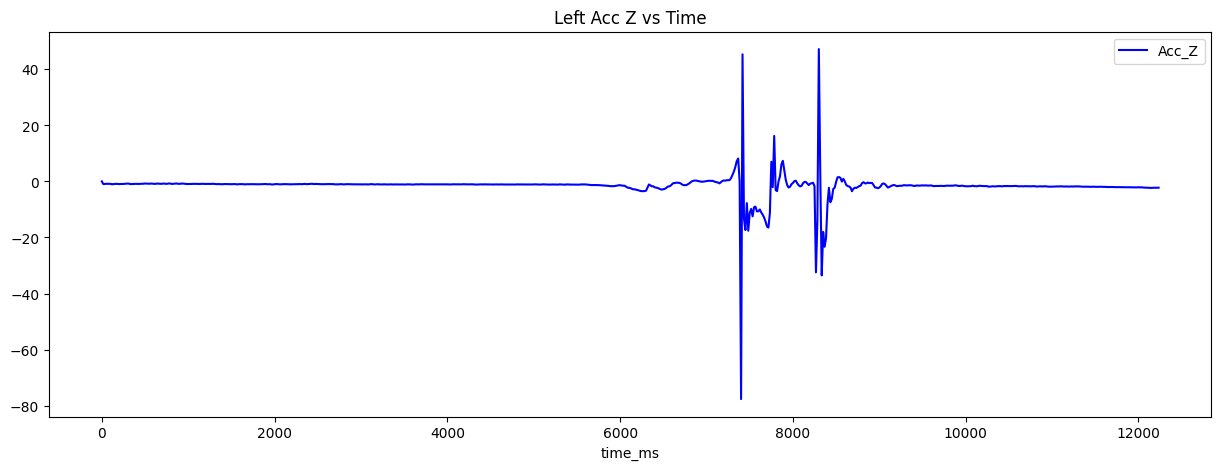

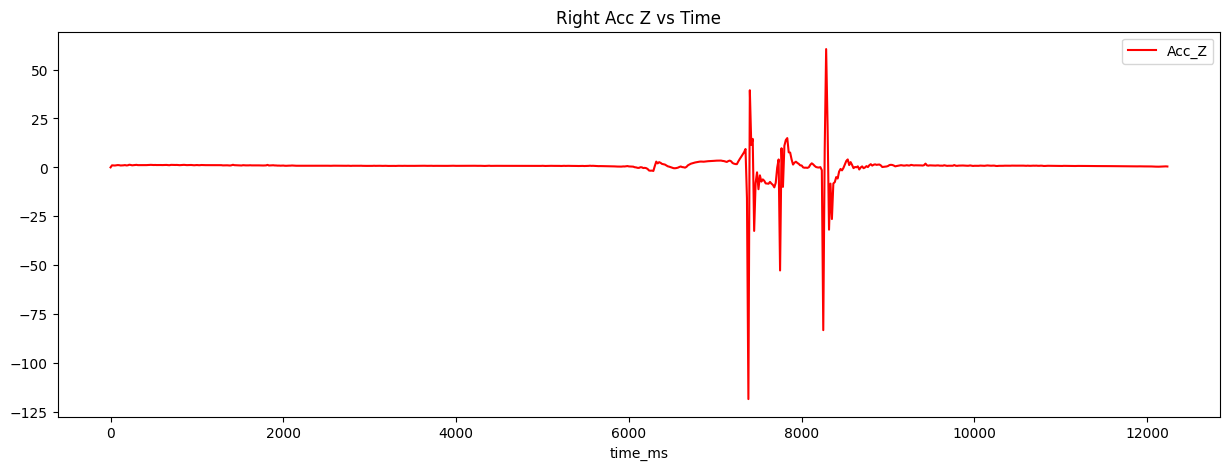

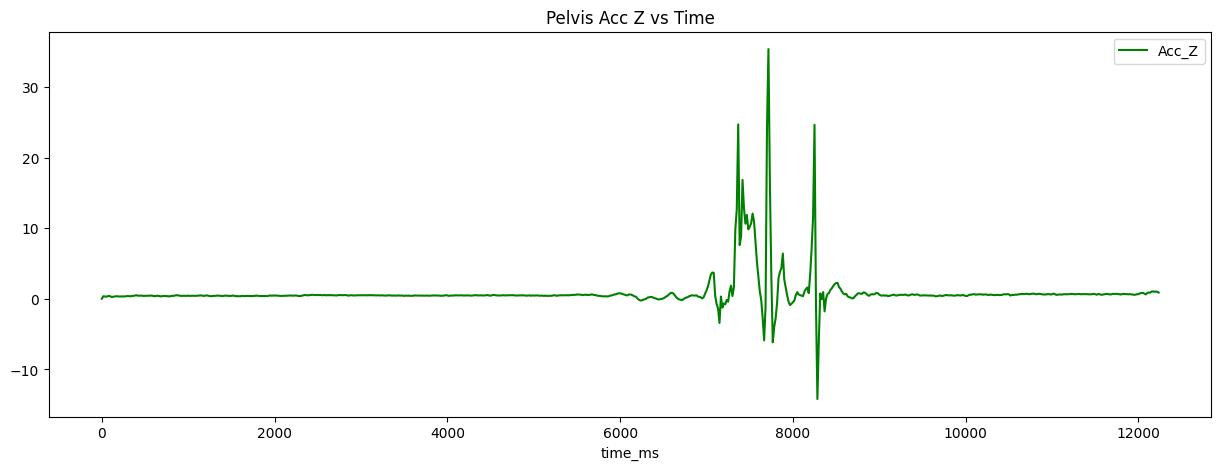

In [38]:
# visualize the data and find the connection between the accelerometer  and times 
left.plot(x='time_ms', y='Acc_Z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='time_ms', y='Acc_Z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='time_ms', y='Acc_Z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')

In [39]:
left[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,735.000000,735.000000
mean,-1.614161,6116.789000
std,4.839191,3538.745981
min,-77.620316,0.000000
25%,-1.726284,3058.394500
50%,-1.096750,6116.789000
75%,-0.965998,9175.183500
max,47.172417,12233.578000


In [40]:
right[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,735.000000,735.000000
mean,0.488210,6116.789000
std,6.990229,3538.745981
min,-118.550705,0.000000
25%,0.713389,3058.394500
50%,0.804799,6116.789000
75%,1.026765,9175.183500
max,60.513512,12233.578000


In [41]:
pelvis[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,735.000000,735.000000
mean,0.859738,6116.789000
std,2.734610,3538.745981
min,-14.225268,0.000000
25%,0.413930,3058.394500
50%,0.474287,6116.789000
75%,0.606263,9175.183500
max,35.383152,12233.578000
